In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [20]:
def straight_line(x, m, c): return m*x + c

def plotting_function(xs, ys, curve_props, sigma_y, xlabel='', ylabel='', plot_shape='k.', round_to=4, tex_pos=(0.45, 0.15)):
    popt, pcov = curve_props
    chisqr = np.sum((ys-straight_line(xs, popt[0], popt[1]))**2/sigma_y**2)
    dof = len(ys) - 2
    chisqr_red = chisqr/dof
    # print(r'Reduced $\chi^2 =$', chisqr_red)

    text = f"If the Equation is y = mx + c\nFor the best fit curve: \n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0], '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1], '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    plt.errorbar(xs, ys, yerr=sigma_y, capsize=3, fmt='k.', label=r'$\sigma_y$')
    plt.plot(xs, ys, 'k.', label='Data Points') 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k', label='Least-square Fit')
    # plt.plot(xFit, straight_line(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--")
    # plt.plot(xFit, straight_line(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

# Na Lamp

In [24]:
N = np.array([5, 7, 10, 2, 12, 15, 20, 17])
delta_d = np.array([19, 28, 41, 5, 32, 37, 73, 52])*0.0001
sigma_y = np.full(len(N), 0.0007)

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.0003123 ± 6.11e-06
    c = 0.0001521 ± 7.59e-05

The curve looks like:


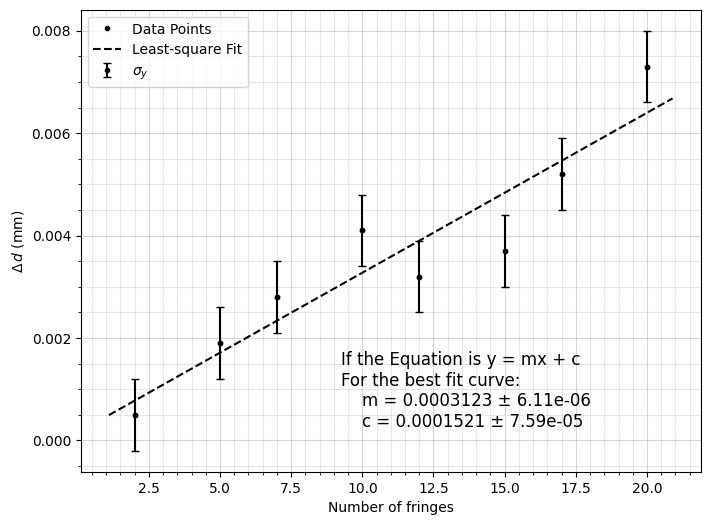

In [25]:
curve = curve_fit(f=straight_line, xdata=N, ydata=delta_d, sigma=sigma_y, absolute_sigma=True)
curve[1][0][0] = 6.11E-06
curve[1][1][1] = 7.59E-05
plotting_function(N, delta_d, curve, sigma_y, 'Number of fringes', r'$\Delta\,d$ (mm)')

In [13]:
wv = 2*curve[0][0]*1e6
wv_err = ((curve[1][0][0])/(curve[0][0]))*wv
print(f'Wavelength: {round(wv)} ± {wv_err}')

Wavelength: 625 ± 0.003656716727465808


# He-Ne Laser

In [14]:
N = np.array([5, 20, 4, 5, 15, 8, 25, 2, 12, 18, 5])
delta_d = np.array([17, 53, 14, 17, 45, 23, 90, 8, 35, 62, 17])*0.0001
sigma_y = np.full(len(N), 0.00055)

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.000324 ± 4.12e-06
    c = -4.118e-05 ± 5.38e-05

The curve looks like:


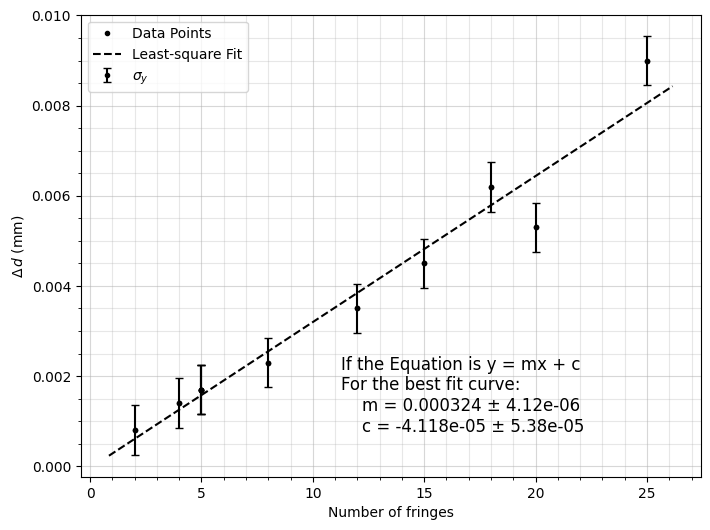

In [22]:
curve = curve_fit(f=straight_line, xdata=N, ydata=delta_d, sigma=sigma_y, absolute_sigma=True)
curve[1][0][0] = 4.12E-06
curve[1][1][1] = 5.38E-05
plotting_function(N, delta_d, curve, sigma_y, 'Number of fringes', r'$\Delta\,d$ (mm)')

In [16]:
wv = 2*curve[0][0]*1e6
wv_err = ((curve[1][0][0])/(curve[0][0]))*wv
print(f'Wavelength: {round(wv)} ± {wv_err}')

Wavelength: 648 ± 45.4244
